# Preprocessing steps analysis for Tiantan datasets

### Import modules and define methods

In [14]:
%reload_ext autoreload
%autoreload 2

from preprocess import *
from argparse import Namespace

import matplotlib.pyplot as plt
plt.set_cmap('gray')

metadata={'lambda': []}

def show_img(img, title='', axis=False, vmin=None, vmax=None):
    imshow_args = {}
    
    if vmin:
        imshow_args['vmin'] = vmin
    if vmax:
        imshow_args['vmax'] = vmax
    
    im_axis = 'on' if axis else 'off'
    plt.axis(im_axis)
    plt.imshow(img, **imshow_args)
    plt.title(title, fontsize=15)

def show_gad_comparison(img_pre, img_low, img_post, vmin=None, vmax=None):
    fig = plt.figure(figsize=(15, 10))
    fig.tight_layout()

    fig.add_subplot(1, 3, 1)
    show_img(img_pre, title='Pre contrast', vmin=vmin, vmax=vmax)

    fig.add_subplot(1, 3, 2)
    show_img(img_low, title='10% dosage', vmin=vmin, vmax=vmax)

    fig.add_subplot(1, 3, 3)
    show_img(img_post, title='Full dosage', vmin=vmin, vmax=vmax)

    plt.show()

def show_comparison(img1, img2, titles=['', ''], vmin=None, vmax=None):
    fig = plt.figure(figsize=(15, 10))
    fig.tight_layout()

    fig.add_subplot(1, 2, 1)
    show_img(img1, title=titles[0], vmin=vmin, vmax=vmax)

    fig.add_subplot(1, 2, 2)
    show_img(img2, title=titles[1], vmin=vmin, vmax=vmax)
    
    plt.show()

def iminfo(img):
    print(img.shape, img.dtype, img.min(), img.max(), img.mean())

def diff_img(img1, img2):
    return np.abs(np.subtract(img1.astype(np.float32), img2.astype(np.float32))).astype(np.float32)

<Figure size 432x288 with 0 Axes>

### Initialize dummy argparse Namespace

In [15]:
args = Namespace(
    path_base='/home/srivathsa/projects/studies/gad/tiantan/data/NO31', verbose=True,
    output='/home/srivathsa/projects/studies/gad/tiantan/preprocess/data/NO31.h5',
    discard_start_percent=0, discard_end_percent=0, normalize=True,
    normalize_fun='mean', transform_type='rigid', scale_matching=True,
    path_zero=None, path_low=None, path_full=None, mask_threshold=0.08,
    override=False, skip_mask=False, scale_dicom_tags=False, skip_scale_im=False,
    skip_registration=False, nslices=20, joint_normalize=False, global_scale_ref_im0=False, noise_mask_area=False
)

### Fetch original images

In [16]:
ims, hdr, metadata = get_images(args, metadata)
orig_ims = np.copy(ims)

path_zero = /home/srivathsa/projects/studies/gad/tiantan/data/NO31/3DT1WMPRAGE_SAG_CS4_301
path_low = /home/srivathsa/projects/studies/gad/tiantan/data/NO31/3DT1WMPRAGE_SAG_CS4_601
path_full = /home/srivathsa/projects/studies/gad/tiantan/data/NO31/3DT1WMPRAGE_SAG_CS4_701
image sizes:  (196, 240, 240) (196, 240, 240) (196, 240, 240)


(240, 240) float32 0.0 607.0 130.1037
(240, 240) float32 0.0 649.0 143.79817
(240, 240) float32 0.0 1434.0 210.33759


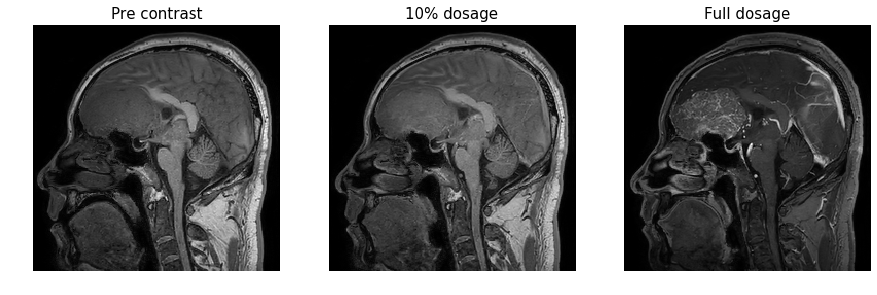

In [17]:
iminfo(ims[96, 0])
iminfo(ims[96, 1])
iminfo(ims[96, 2])

show_gad_comparison(ims[96, 0], ims[96, 1], ims[96, 2])

### Mask images

In [18]:
ims, mask, metadata = mask_images(args, ims, metadata)

masking


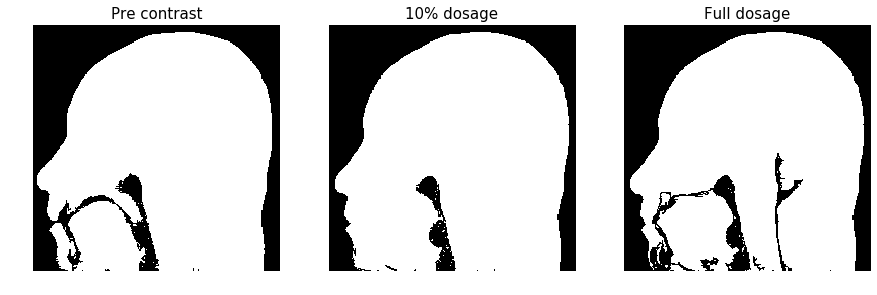

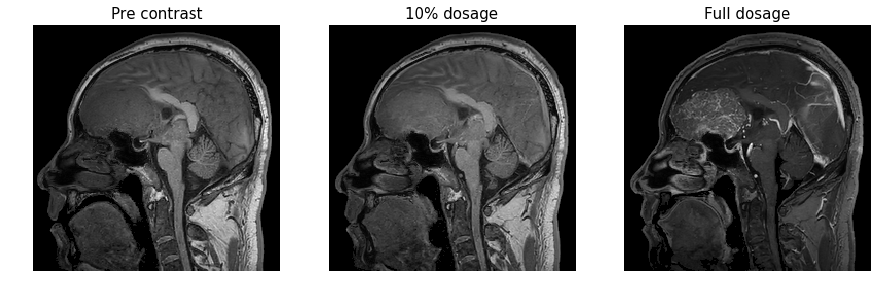

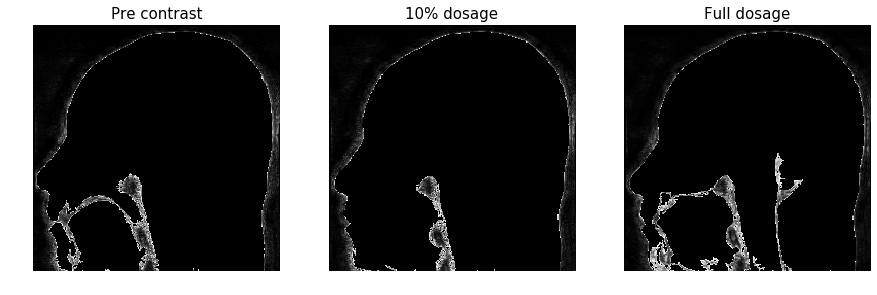

In [19]:
show_gad_comparison(mask[96, 0], mask[96, 1], mask[96, 2])
show_gad_comparison(ims[96, 0], ims[96, 1], ims[96, 2])

pre_diff = diff_img(orig_ims[96, 0], ims[96, 0])
low_diff = diff_img(orig_ims[96, 1], ims[96, 1])
post_diff = diff_img(orig_ims[96, 2], ims[96, 2])

show_gad_comparison(pre_diff, low_diff, post_diff)

### Scale DICOM slope and intercept

In [7]:
ims, metadata = dicom_scaling(args, ims, hdr, metadata)

(240, 240) float32 0.0 570.0 109.19512
(240, 240) float32 0.0 769.0 132.9971
(240, 240) float32 0.0 1362.0 172.27556


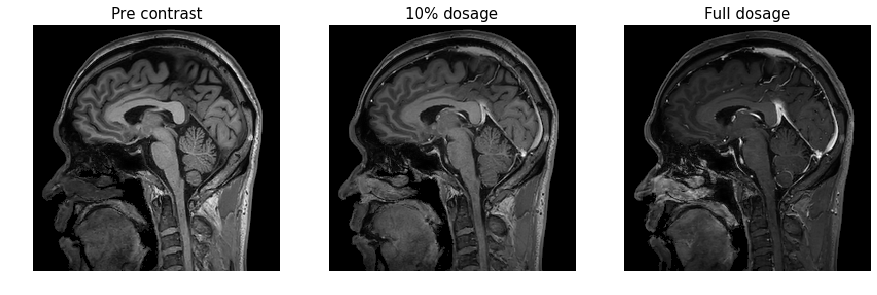

In [8]:
iminfo(ims[96, 0])
iminfo(ims[96, 1])
iminfo(ims[96, 2])

show_gad_comparison(ims[96, 0], ims[96, 1], ims[96, 2])

### Histogram normalization

In [9]:
orig_ims = np.copy(ims)
ims, metadata = hist_norm(args, ims, metadata)

image intensity normalization
scaling done, 1.73 s
image intensity normalization
scaling done, 1.1 s


(240, 240) float32 0.0 570.0 109.19512
(240, 240) float32 0.0 652.9431 118.8643
(240, 240) float32 0.0 659.8182 120.7467


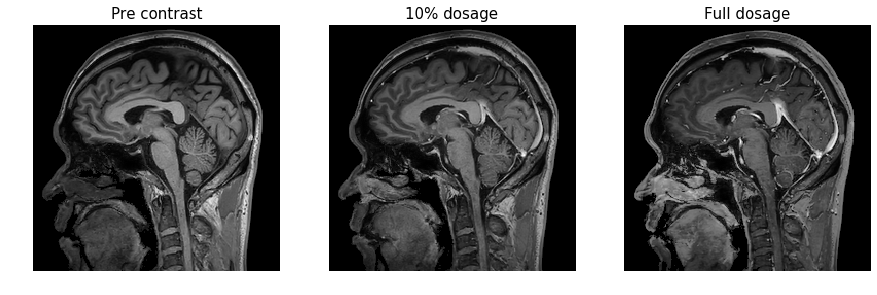

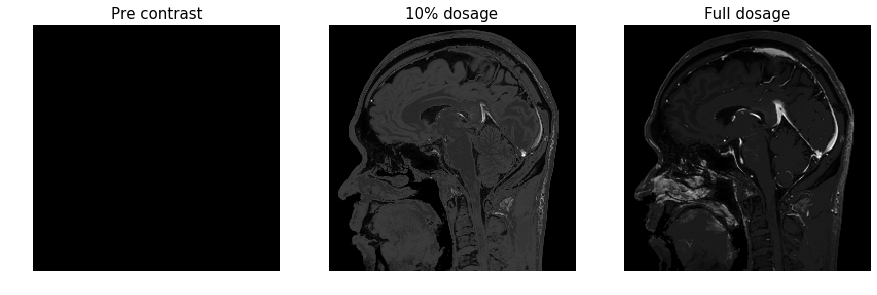

In [10]:
iminfo(ims[96, 0])
iminfo(ims[96, 1])
iminfo(ims[96, 2])

show_gad_comparison(ims[96, 0], ims[96, 1], ims[96, 2])

pre_diff = diff_img(orig_ims[96, 0], ims[96, 0])
low_diff = diff_img(orig_ims[96, 1], ims[96, 1])
post_diff = diff_img(orig_ims[96, 2], ims[96, 2])

show_gad_comparison(pre_diff, low_diff, post_diff)

### Image registration

In [20]:
ims, metadata = register(args, ims, metadata)

image registration
registration done, 6.09 s
low dose transform parameters: ('-0.00478916', '0.00302819', '-0.0139782', '0.760153', '0.526063', '0.0854707')
image registration
registration done, 5.97 s
full dose transform parameters: ('-0.00687516', '0.00121772', '-0.0137179', '0.886315', '0.69786', '0.0168734')


(240, 240) float32 0.0 641.81537 142.61647
(240, 240) float32 0.0 1420.9003 205.93317


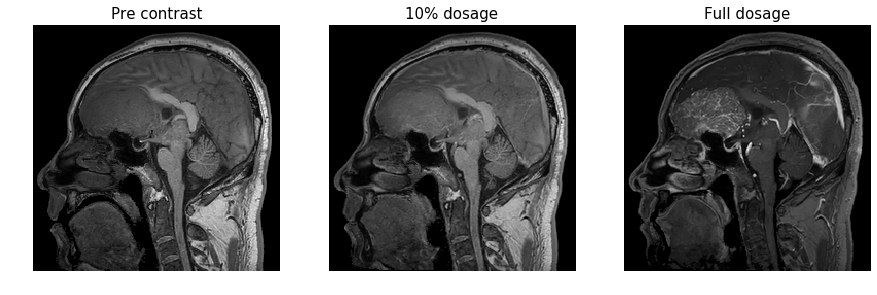

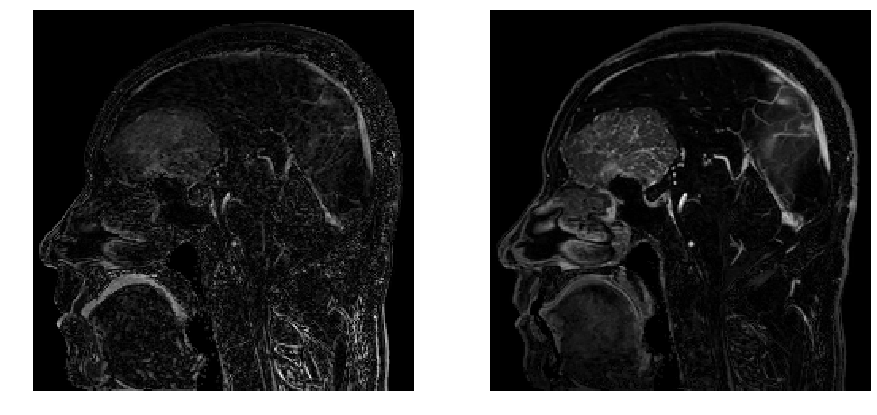

In [22]:
iminfo(ims[96, 1])
iminfo(ims[96, 2])

show_gad_comparison(ims[96, 0], ims[96, 1], ims[96, 2])
show_comparison(diff_img(ims[96, 0], ims[96, 1]), diff_img(ims[96, 0], ims[96, 2]))

np.save('/home/srivathsa/projects/studies/gad/tiantan/inference/test/NO31_onlyreg.npy', ims)

### Zoom

In [13]:
args.zoom = 512
args.zoom_order = 3

ims_zoom, metadata = zoom_process(args, ims, metadata)

zooming to 512
zoom 0
zoom 0 done: 18.58206343650818 s
zoom 1
zoom 1 done: 18.594063758850098 s
zoom 2
zoom 2 done: 18.47681427001953 s
(196, 3, 512, 512)


(196, 3, 512, 512) float32 -65.18555 711.56256 58.20119


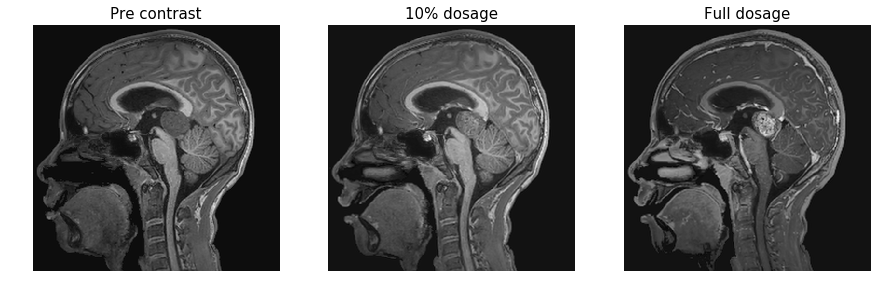

In [14]:
iminfo(ims_zoom)
show_gad_comparison(ims_zoom[96, 0], ims_zoom[96, 1], ims_zoom[96, 2])

### Match scales and global normalization

In [15]:
orig_ims = np.copy(ims)

ims, ims_mod, metadata = prescale_process(args, ims, mask, metadata)
ims, ims_mod, metadata = match_scales(args, ims, ims_mod, metadata)
ims, metadata = global_norm(args, ims, ims_mod, metadata)

intensity before scaling:
mean [148.72443 155.04106 160.59453]
median [143.      148.35495 149.82164]
max [607.      603.91156 686.8405 ]
scale low: 0.9721390790930337
scale full: 0.9721390790930337
done scaling data (0.62 s)
intensity after scaling:
mean [148.72443 150.72105 156.11937]
median [143.      144.22165 145.64746]
max [607.      587.086   667.70447]
normalizing with function  mean <function mean at 0x7fbf002e8048>
intensity before global scaling:
mean [148.72443 150.6912  156.02441]
median [143.      144.22165 145.64746]
max [607.      587.086   667.70447]
global scaling: [[148.72443 150.6912  156.02441]]
done (0.06s)
intensity after global scaling:
mean [0.99999255 0.9999693  0.99999315]
median [0.9615098  0.95706755 0.93349147]
max [4.081374  3.8959544 4.279487 ]


(240, 240) float32 0.0 3.5770855 0.61041355
(240, 240) float32 -0.2561719 3.3352993 0.61881167
(240, 240) float32 -0.28425276 4.007104 0.61839503


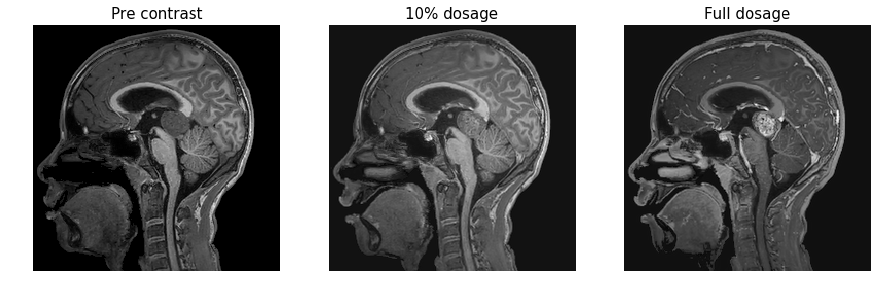

In [16]:
iminfo(ims[96, 0])
iminfo(ims[96, 1])
iminfo(ims[96, 2])

show_gad_comparison(ims[96, 0], ims[96, 1], ims[96, 2])